In [1]:
import numpy as np                   
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns        
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv(r"C:\Users\HP\Downloads\py\Airbnb\listings1.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.82,4.69,4.69,NaN,f,2,1,1,0,0.26
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.56
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,...,4.81,4.64,4.67,NaN,f,1,0,1,0,1.21


In [46]:
df.shape

(87946, 75)

In [47]:
def status(dt):
    stat = pd.DataFrame(index=dt.columns)
    stat['percentage_of_missing_values'] = (dt.isna().sum()/len(dt)) * 100
    stat['sample'] = dt.iloc[10]
    stat['data type'] = dt.dtypes
    return stat.sort_values('percentage_of_missing_values',ascending=False).head(-1)


In [48]:
df_s= status(df)

In [49]:
df_s.head(25)

,percentage_of_missing_values,sample,data type
neighbourhood_group_cleansed,100.000000,NaN,float64
bathrooms,100.000000,NaN,float64
calendar_updated,100.000000,NaN,float64
license,99.998863,NaN,object
host_about,47.802060,I am truly passionate about the Kent coast and...,object
neighborhood_overview,46.342074,NaN,object
neighbourhood,46.340936,NaN,object
host_neighbourhood,45.331226,Forest Hill,object
bedrooms,37.266050,2.0,float64
host_response_time,32.881541,within an hour,object


In [50]:
len(df)

87946

# Cleaning and preprocessing 



In [51]:
#'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license', 'host_about'
#These columns have alot of information missing values so they will be dropped

df.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license', 'host_about'],axis=1,inplace=True)

In [52]:
#Description
#This column will be deleted

df.drop('description',axis=1,inplace=True)


# Question 1: Which London boroughs are busiest and why?
    
-Based on analysis
    
**Answer: The top 10 busiest boroughs were those in inner London with Westminster being the most popular borough. Inner London boroughs receive a large volume of
    tourists due to having alot of beautiful attractions. They are also closer to the business hub of England, the city of London borough. The city of
    London borough has the fifth lowest listings, this can be attributed to a low number of housing being built in this part of London since its famously known as 
    a business area**
    
**Business Value: Understanding the busiest London boroughs can be valuable for various stakeholders, such as property investors, tourism agencies, and local businesses. It provides insights into areas with high demand for accommodations and potential opportunities for real estate investment or tourism services.**


In [53]:
# pre-processing Neighbourhood_cleaned column
#This column will be renamed to London boroughs

df.rename(columns={'neighbourhood_cleansed':'London_Borough'},inplace=True)

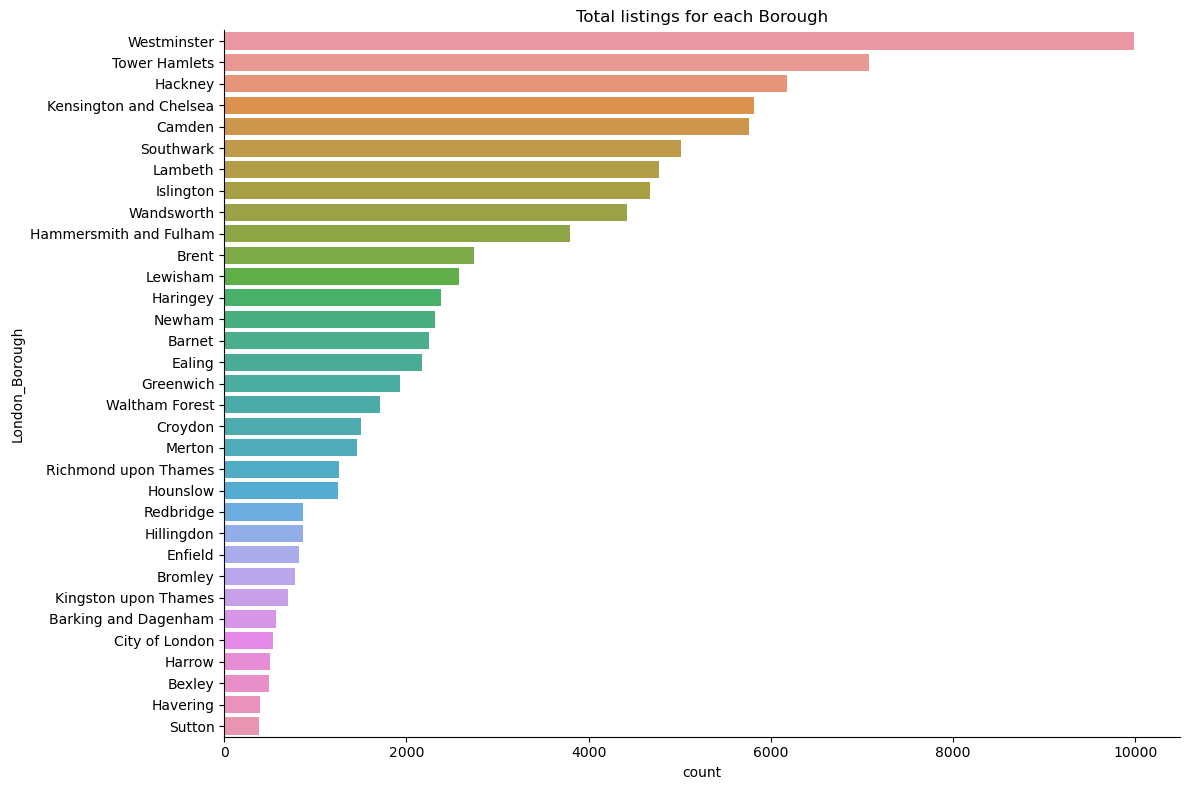

In [54]:
#Analysis
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(12,8))
sns.countplot(data=df,y='London_Borough',order=df.London_Borough.value_counts().index)
plt.title('Total listings for each Borough')
sns.despine()
plt.savefig('Popularity')

# Question 2 Which boroughs have the highest prices and why?

**Answer The boroughs with the highest average and median property prices were Westminster (320 USD) , Kensington and Chelsea (307 USD), and Barking and Dagenham (245 USD). 
This is because these boroughs have some of the most expensive properties in the world. Its sensible for the owners to list their properties at high prices**

**Business Value: Knowing which boroughs have the highest property prices is crucial for real estate investors, property developers, and potential buyers. It helps in strategic decision-making, targeting high-value markets, or understanding the luxury real estate landscape.**

In [55]:
# Preprocessing Price column

from statistics import mode,mean,median

#Column data type is going to be changed to a float

df.price = df.price.str.strip('$')
df.price = df.price.str.replace(',','')
df.price=df.price.astype(float)


jh = df.groupby('London_Borough').agg({'price':'mean'}).sort_values('price',ascending=False)
jh.rename(columns={'price':'Average price'},inplace=True)
jh.reset_index(inplace=True)



    index          London_Borough  Average price
0       0             Westminster     320.591373
1       1  Kensington and Chelsea     307.432795
2       2    Barking and Dagenham     245.840426
3       3          City of London     243.722015
4       4                  Camden     203.288171
5       5                Hounslow     182.455706
6       6               Southwark     180.605184
7       7                   Brent     179.079197
8       8  Hammersmith and Fulham     177.230830
9       9               Islington     173.169198
10     10              Wandsworth     167.573207
11     11    Richmond upon Thames     163.402546
12     12                  Barnet     160.523344
13     13                  Merton     153.220922
14     14                  Newham     151.510169
15     15                Haringey     149.827876
16     16                 Lambeth     141.038752
17     17    Kingston upon Thames     134.804006
18     18           Tower Hamlets     133.069633
19     19           

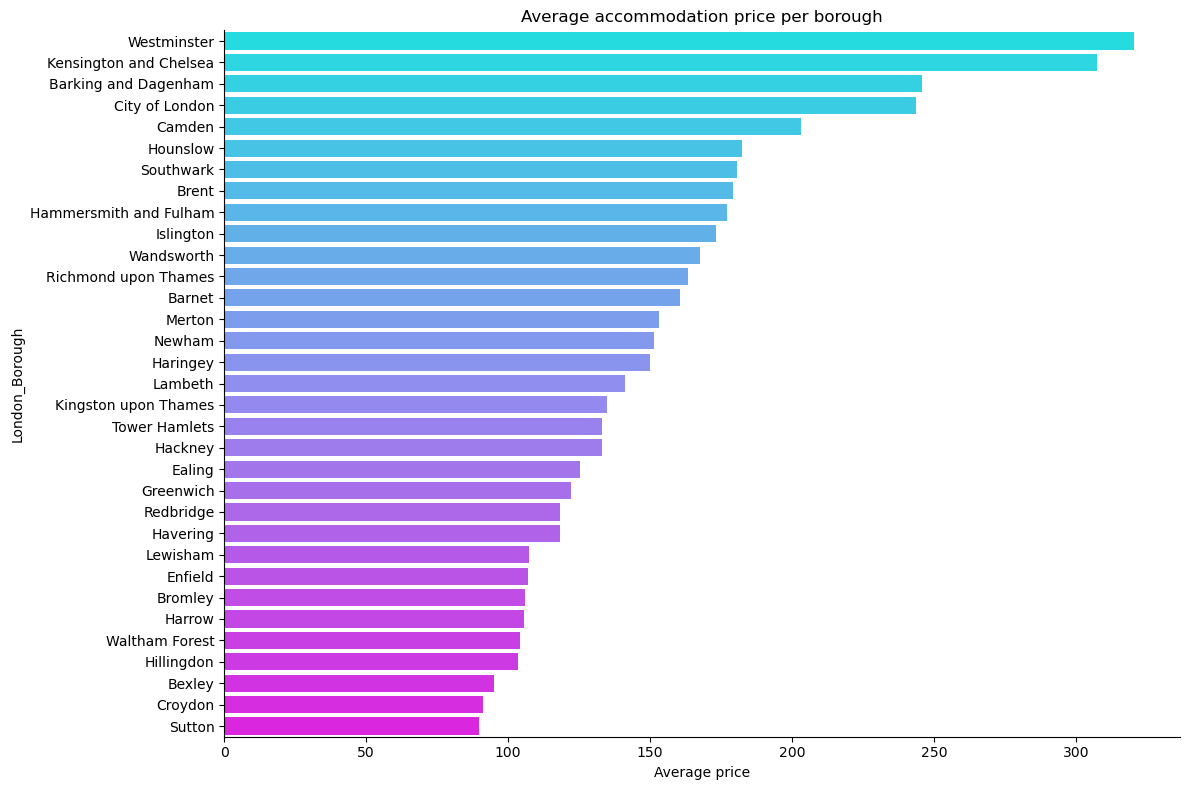

In [56]:
#Analysis
plt.figure(figsize=(12,8))
sns.barplot(data=jh,y='London_Borough',x='Average price',palette='cool') # Wistia_r #autumn #cool
plt.title('Average accommodation price per borough')
sns.despine()

# Result table
result_table_jh = jh.reset_index()
print(result_table_jh)

# Question 3: Why are some hosts busier than others?

**Answer: The top 100 hosts with the most lisitngs were compared to others to find out why they were busier, the reasons were:**

1. Their properties are more available
2. They tend to have properties in the most popular boroughs(high price)
3. Their properties accommodate more people
4. Their properties have more bedrooms and beds**

**Business Value: Understanding why some hosts are busier than others is crucial for both hosts and the platform itself. For hosts, it provides insights into factors contributing to success, and for the platform, it helps enhance user experience and engagement.**

In [57]:
# Preprocessing

#host total listings count
# Misssing values will be replaced by median

df.host_total_listings_count.fillna(df.host_total_listings_count.median(), inplace=True)
df.host_total_listings_count = df.host_total_listings_count.astype('float64')


#Host since column
#Going to be changed from object to date-time

df['host_since'] = pd.to_datetime(df.host_since)

#Duration of being a host
#A new column that shows the total duration a user has been a host The date used as the final date is the date the data was compiled. This date is 09/01/2020 which was obtained from inside Airbnb website

Final_date = pd.to_datetime('09/01/2020')
df['Duration_as_host'] = Final_date - df.host_since
df.drop( 'host_since',axis=1,inplace=True)
df.Duration_as_host

df.Duration_as_host = df.Duration_as_host/np.timedelta64(1,'Y')
df.rename(columns={'Duration_as_host':'Years_as_host'},inplace=True)


# #Amenities
#Amenities will be reduced to just the 10 most important amenities which are based on 2 articles from the 
#Airbnb website and about the top 10 amenities.Link ,Link2. These will include: Wi-Fi,air-conditioning,Kitchen,parking, 
#friendly pet policy,Jacuzzi,washing machine,heating,TV,swimming pool
    
df.amenities[:1].values


#Creating a list of all the amenities provided by hosts
Amenities_list = list(df.amenities)
Amenities_list_as_str = ' '.join(Amenities_list)
Amenities_list_as_str = Amenities_list_as_str.replace('{','')
Amenities_list_as_str = Amenities_list_as_str.replace('}','')
Amenities_list_as_str = Amenities_list_as_str.replace('"' ,'')
Amenities_listt = list(Amenities_list_as_str.split(','))
Amenities_listt = list(set(Amenities_listt))
sorted(Amenities_listt)

df.loc[df.amenities.str.lower().str.contains('wifi|wi-fi'), 'WiFi'] = 1
df.loc[df.amenities.str.lower().str.contains('air conditioning'), 'Air_conditioning'] = 1
df.loc[df.amenities.str.lower().str.contains('kitchen'), 'Kitchen'] = 1
df.loc[df.amenities.str.lower().str.contains('parking'), 'Parking'] = 1
df.loc[df.amenities.str.lower().str.contains('pets allowed|pets'), 'Pet_friendliness'] = 1
df.loc[df.amenities.str.lower().str.contains('jacuzzi|spa'), 'Jacuzzi'] = 1
df.loc[df.amenities.str.lower().str.contains('washing machine|washer'), 'Washer'] = 1
df.loc[df.amenities.str.lower().str.contains('heating'), 'Heating'] = 1
df.loc[df.amenities.str.lower().str.contains('tv'), 'TV'] = 1
df.loc[df.amenities.str.lower().str.contains('swimming pool|pool'), 'Swimming pool'] = 1


#filling missing values of 10 amenity columns with 0 and dropping the amenities column
df.fillna(0,inplace=True)
df.drop('amenities',axis=1,inplace=True)

#choosing top 100 hosts listings
z = list(df.sort_values('host_total_listings_count',ascending=False)['host_id'])
busiet_hosts_list=[]
def busiest_hosts_maker(ol,nl):
    for host in ol:
        if not host in nl:
            nl.append(host)
    return nl
busiest_hosts_maker(z,busiet_hosts_list)
busiet_hosts_list=busiet_hosts_list[:100]
less_busy_hosts = busiet_hosts_list[100:] 

#Create new column to classify hosts into top 100 and non-top 100 busiest AirBnb hosts
df.loc[df.host_id.isin(busiet_hosts_list),'100_busiest_hosts'] = 'Top 100 busiest host'
df['100_busiest_hosts'].fillna('None top 100 busiest host',inplace=True)

In [63]:
# Analysis

df.groupby('100_busiest_hosts').agg(
{'price':'mean','availability_365':mean,'London_Borough':mode,'review_scores_rating':mean,
 'Years_as_host':mean,'accommodates':mean,'bedrooms':mean,'beds':mean})




,price,availability_365,London_Borough,review_scores_rating,Years_as_host,accommodates,bedrooms,beds
100_busiest_hosts,,,,,,,,
None top 100 busiest host,159.172128,119.196105,Westminster,3.494133,3.525198,3.134250,1.088448,1.761579
Top 100 busiest host,475.904677,146.569665,Westminster,2.698766,3.370762,3.578922,1.538487,2.031991


In [64]:
df.groupby('100_busiest_hosts').agg({
    'WiFi':mean, 'Air_conditioning':mean,'Kitchen':mean, 'Parking':mean,
    'Pet_friendliness':mean, 'Jacuzzi':mean, 'Washer':mean,'Heating':mean, 'TV':mean, 
    'Swimming pool':mean
})



,WiFi,Air_conditioning,Kitchen,Parking,Pet_friendliness,Jacuzzi,Washer,Heating,TV,Swimming pool
100_busiest_hosts,,,,,,,,,,
None top 100 busiest host,0.963613,0.088020,0.918399,0.494156,0.119162,0.410097,0.879530,0.851824,0.719005,0.011334
Top 100 busiest host,0.925625,0.080221,0.858396,0.130724,0.069828,0.321858,0.758525,0.888600,0.766645,0.024359


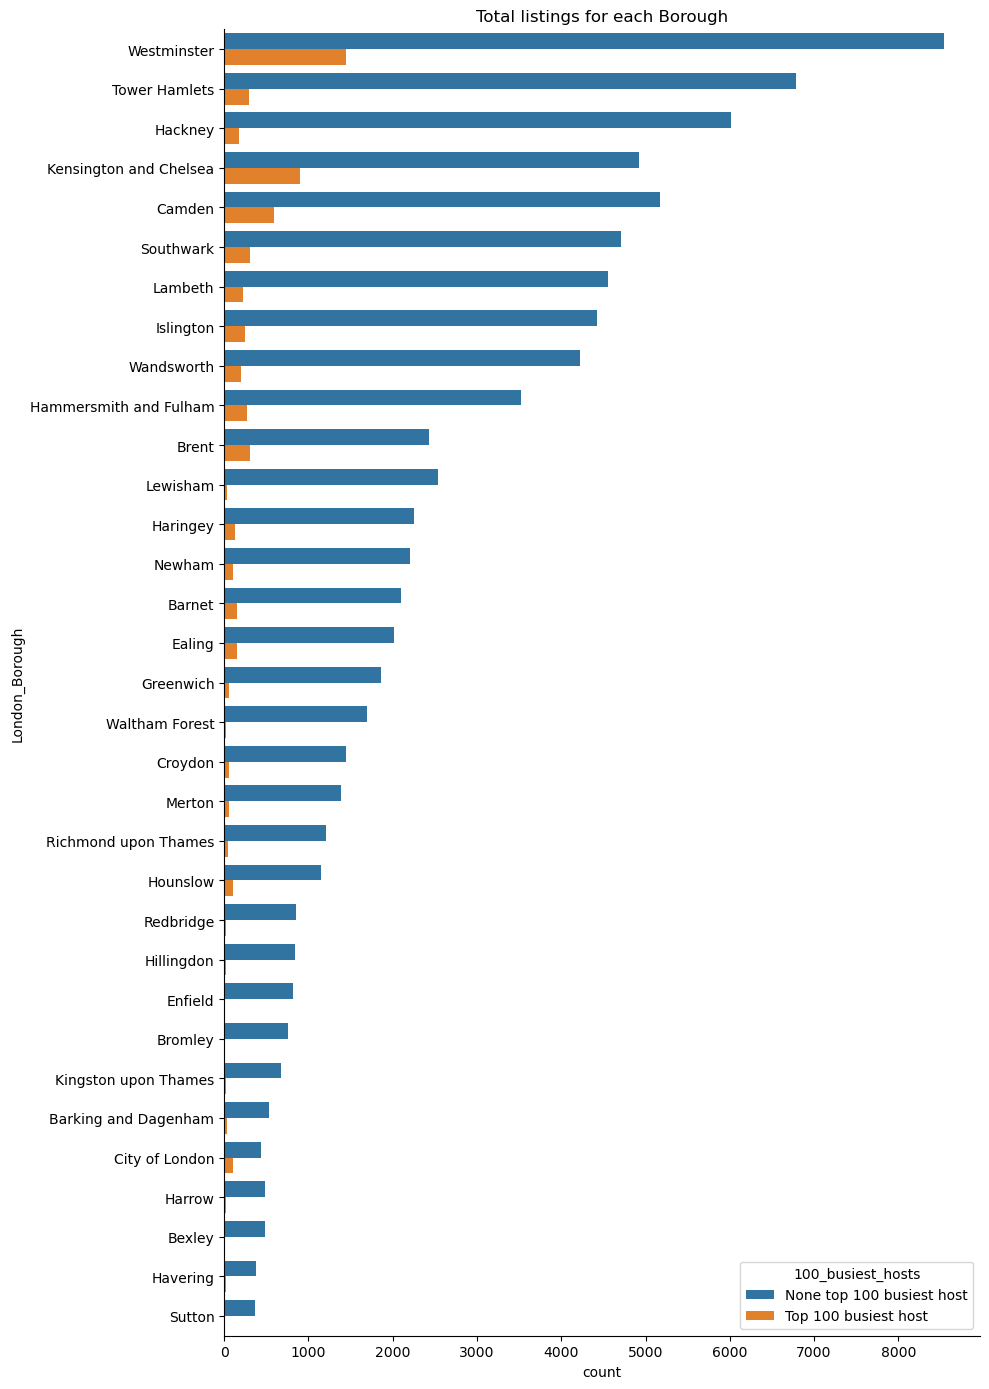

In [65]:
plt.figure(figsize=(10,14))
sns.countplot(data=df,y='London_Borough',order=df.London_Borough.value_counts().index,hue='100_busiest_hosts')
plt.title('Total listings for each Borough')
sns.despine()

# Question 4 Which property types are very popular amongst AirBnb hosts?

**Answer:**

1.Entire rental unit  
2. Private room in rental unit 
3. Private room in home   
4. Entire condo  
5. Entire home 

**Business Value: Identifying popular property types among Airbnb hosts is valuable for both hosts and the platform. For hosts, it informs them about the types of properties that are in demand, and for the platform, it helps in understanding user preferences and optimizing the user experience.**

In [59]:
# Preprocessing

df.property_type.value_counts(normalize=True)

Entire rental unit                   0.383190
Private room in rental unit          0.164362
Private room in home                 0.121427
Entire condo                         0.098879
Entire home                          0.085928
                                       ...   
Shared room in serviced apartment    0.000011
Yurt                                 0.000011
Earthen home                         0.000011
Private room in camper/rv            0.000011
Private room in cave                 0.000011
Name: property_type, Length: 102, dtype: float64

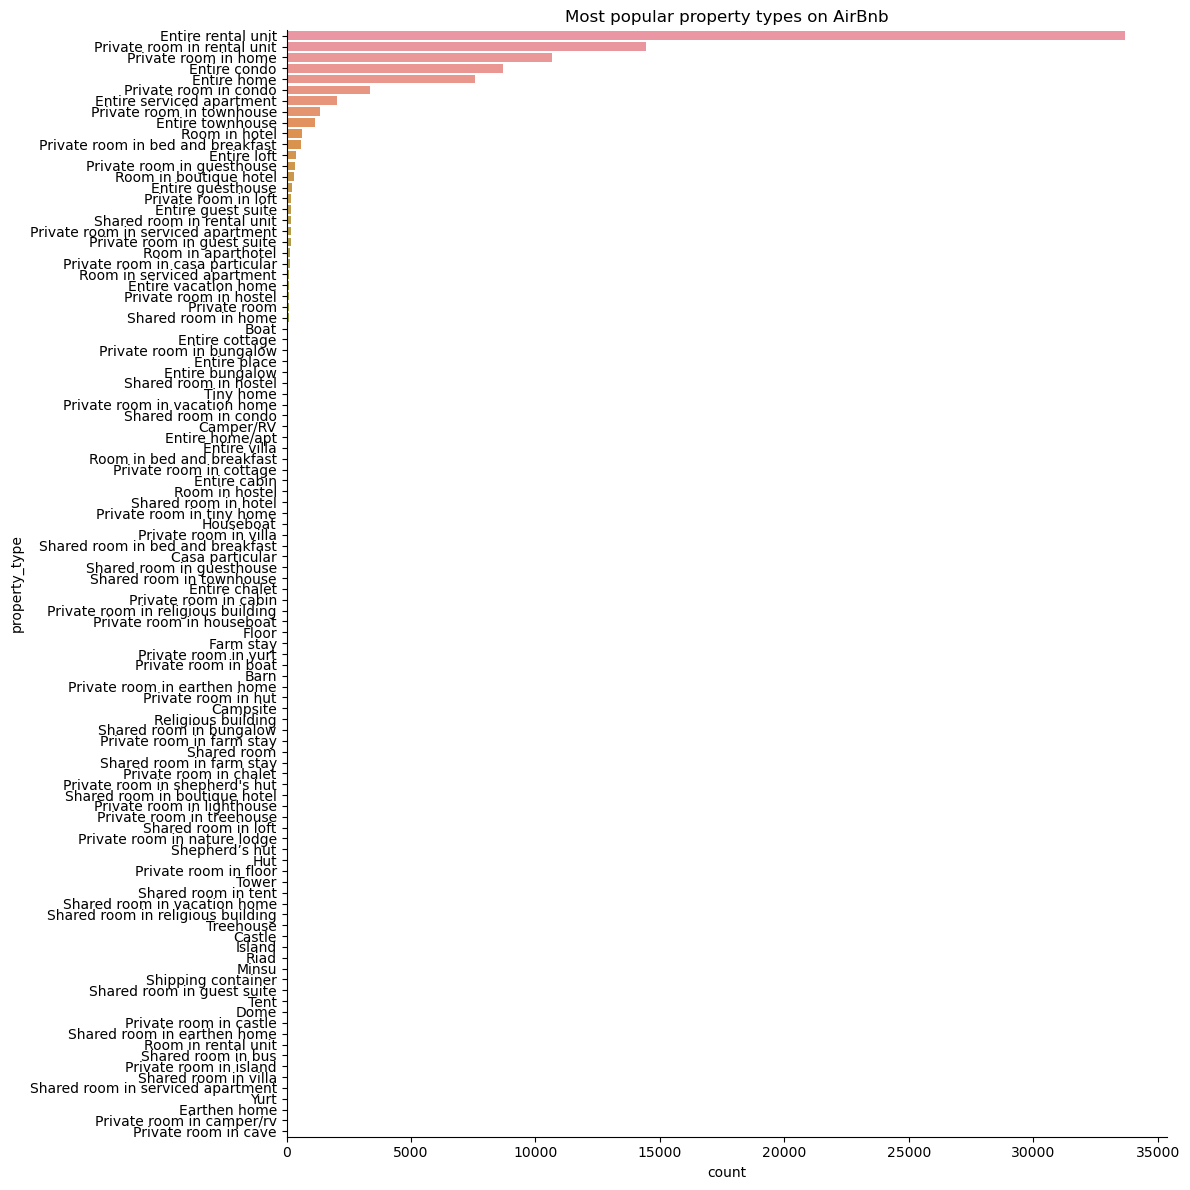

In [60]:
 
rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(12,12))
sns.countplot(data=df,y='property_type',order=df.property_type.value_counts().index)
plt.title('Most popular property types on AirBnb')
sns.despine()
plt.savefig('Apartments most common')

# Question 5 Which is most Expensive room type?

 **Answer: Hotel room is most expensive room type with price 256.09 USD followed by Entire home/apt with price 230.16 USD, shared room at 119.71 
   USD and private room at  119.71 USD**
    
 
**Business Value: Knowing the most expensive room types on Airbnb is valuable for both hosts and guests. For hosts, it informs pricing strategies, and for guests, it helps in budgeting and making informed choices based on preferences and affordability.**

In [61]:

tempdf = df[['room_type',  'price']]
temp = tempdf.groupby(by=['room_type'], as_index=False).agg({'price': 'mean'}).sort_values(['price'], ascending=False, ignore_index=True)


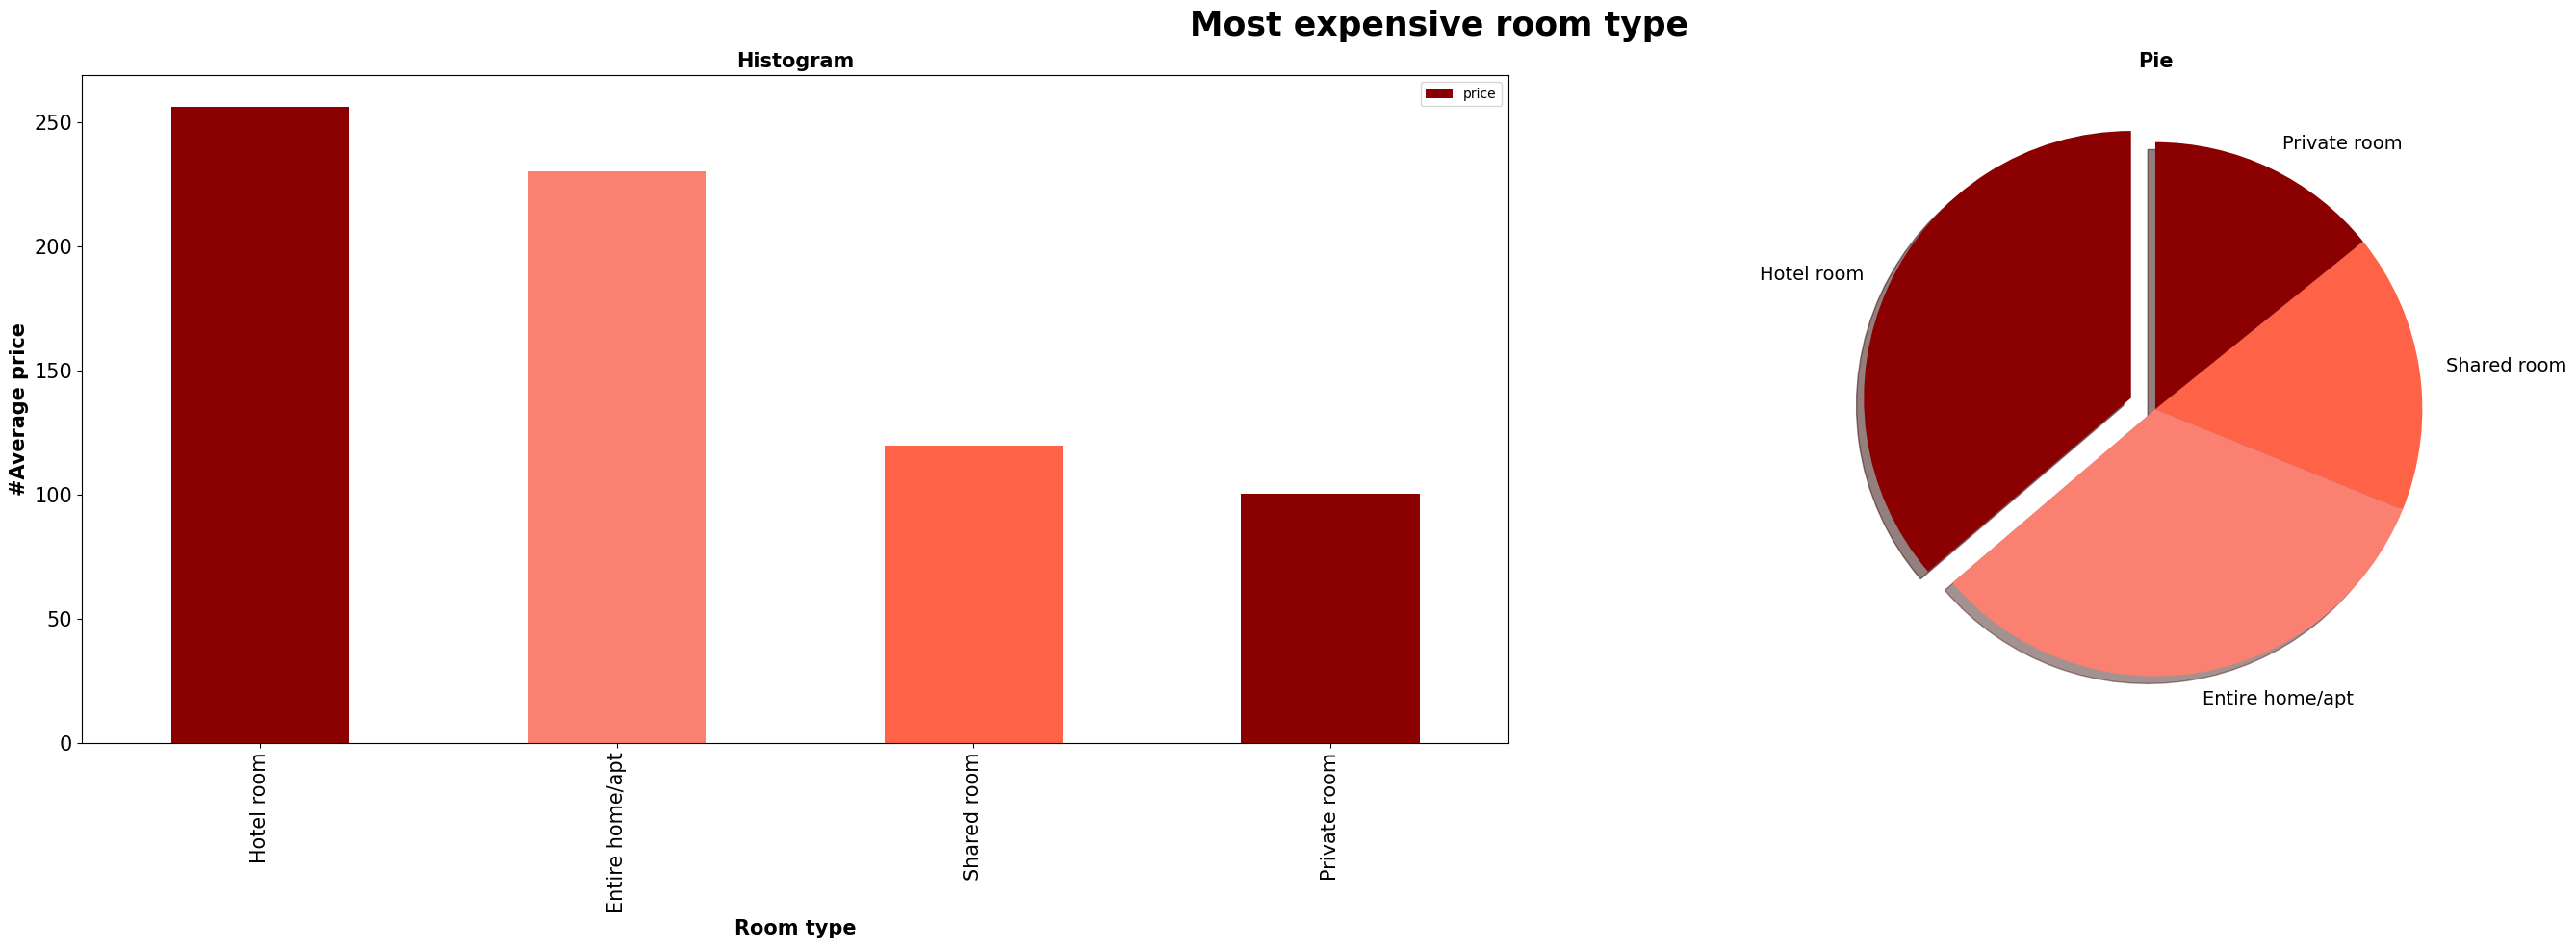

   index        room_type       price
0      0       Hotel room  256.095890
1      1  Entire home/apt  230.168539
2      2      Shared room  119.716553
3      3     Private room  100.231207


In [62]:
# Calculate the number of room types
num_room_types = len(temp)

# Generate explode values dynamically
explode = tuple(0.1 if i == 0 else 0 for i in range(num_room_types))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Most expensive room type', fontweight='bold', fontsize=25)

# Bar chart
temp.plot(kind='bar', x='room_type', y='price', color=['darkred', 'salmon', 'tomato'], figsize=(30, 10), fontsize=15, ax=ax1)
ax1.set_title('Histogram', fontweight='bold', fontsize=15)
ax1.set_ylabel('#Average price', fontweight='bold', fontsize=15)
ax1.set_xlabel('Room type', fontweight='bold', fontsize=15)

# Pie chart
temp.plot(kind='pie', x='room_type', y='price', figsize=(30, 10), startangle=90, shadow=True,
          colors=['darkred', 'salmon', 'tomato'], labels=temp['room_type'].unique(), legend=False, fontsize=14,
          explode=explode, ax=ax2)
ax2.set_title('Pie', fontweight='bold', fontsize=15)
ax2.set_ylabel('')
ax2.set_xlabel('')

# Adjust layout
fig.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

# Display result table
 
result_table_1 = temp.reset_index()
print(result_table_1)

# Question 6 What is availability distribution by room type

**Answer**
1. Entire home/apt: The majority of Entire home/apartment listings have a median availability of 70 days, with a wide range from 0 to 365 days.

2. Hotel room: Hotel rooms have a median availability of 176 days, with a moderate standard deviation of 132.80 days.

3. Private room: Private rooms show a median availability of 52 days, with a diverse distribution ranging from 0 to 365 days.

4. Shared room: Shared rooms exhibit a median availability of 86 days, with a considerable spread from 0 to 365 days.
    
**Business Value: Understanding availability distribution by room type is crucial for both hosts and guests. For hosts, it informs decisions about pricing strategies and managing booking calendars, while for guests, it helps in planning stays based on room type availability.**


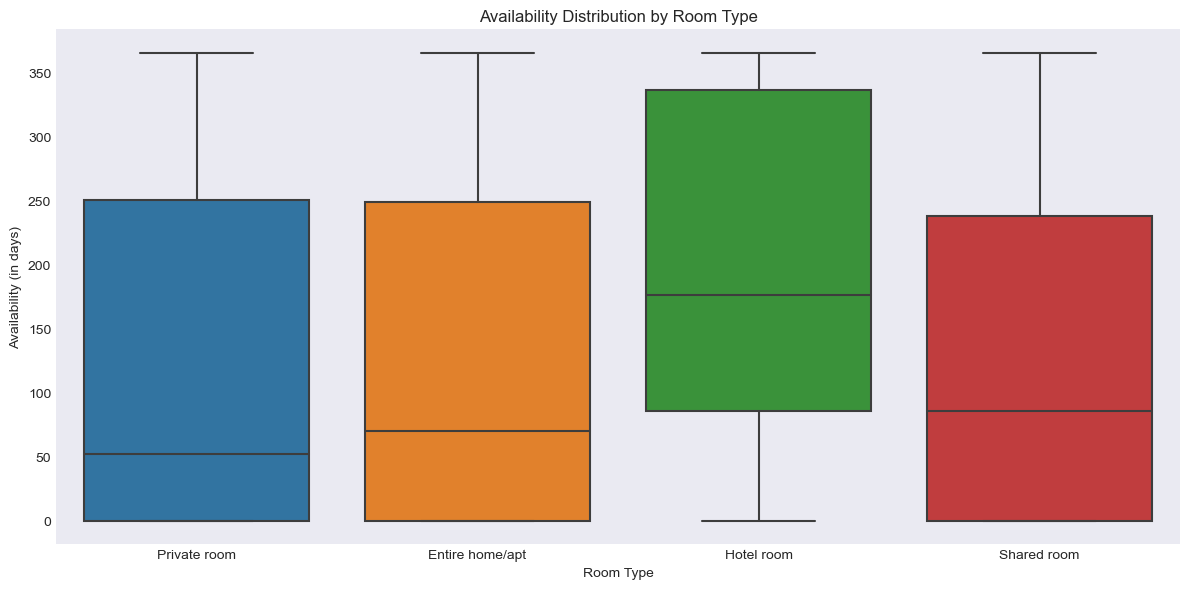

         room_type    count        mean         std  min   25%    50%    75%  \
0  Entire home/apt  54575.0  122.941237  132.720363  0.0   0.0   70.0  249.0   
1       Hotel room    219.0  199.022831  132.801239  0.0  85.5  176.0  336.0   
2     Private room  32711.0  117.521262  137.345451  0.0   0.0   52.0  250.0   
3      Shared room    441.0  122.551020  135.759891  0.0   0.0   86.0  238.0   

     max  
0  365.0  
1  365.0  
2  365.0  
3  365.0  


In [84]:

# Boxplot to visualize availability distribution by room type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='availability_365', data=df)
plt.title('Availability Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (in days)')
plt.show()

# Display result table
result_table_7 = df.groupby('room_type')['availability_365'].describe().reset_index()
print(result_table_7)

# Question 7 What is Distribution of Airbnb rental prices in London (Boxplot)

**Answer Most properties are available in the range of 60 USD to 190 USD per night with an average of approximately 120 USD**


**Business Value: Understanding the distribution of Airbnb rental prices is valuable for both hosts and guests. For hosts, it informs pricing decisions, and for guests, it helps in budgeting and selecting accommodations within their preferred price range.**

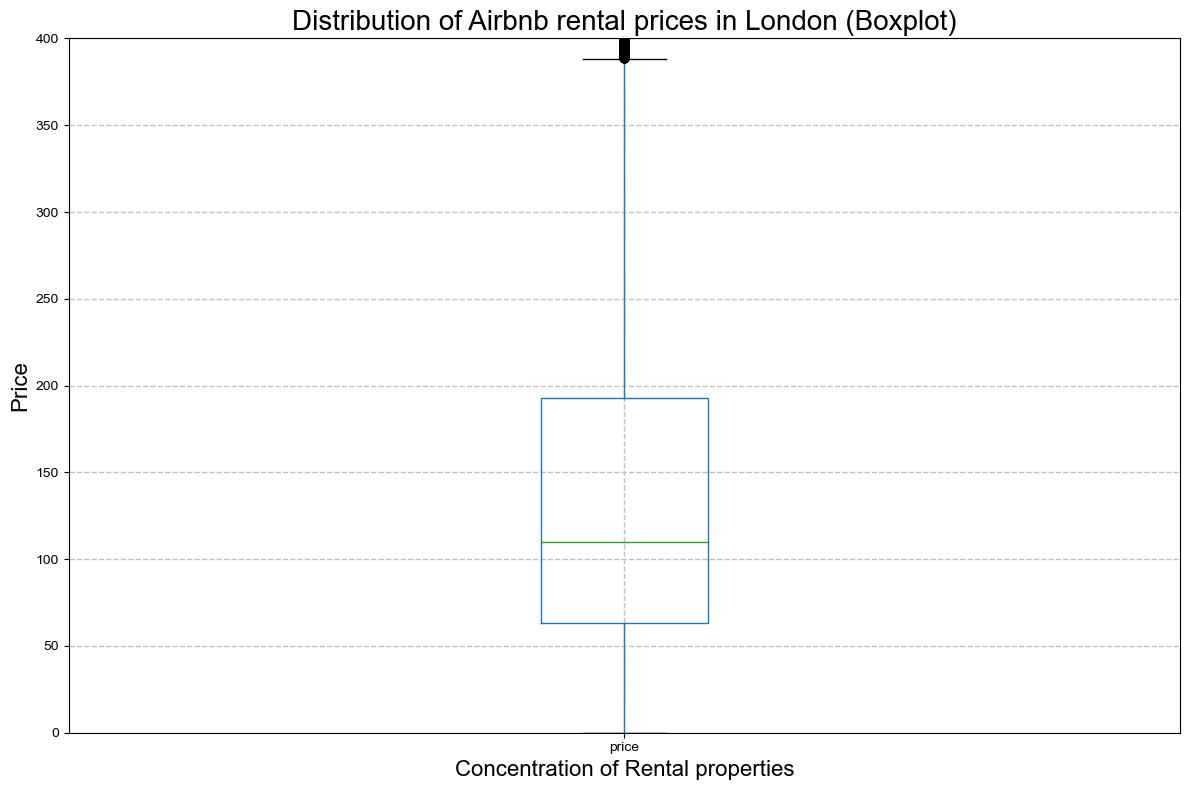

In [68]:
df.boxplot(column='price', grid=True, figsize=(12,8))
plt.style.use('seaborn-dark')
plt.title('Distribution of Airbnb rental prices in London (Boxplot)', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Concentration of Rental properties', fontsize=16)
plt.ylim(0,400)
plt.grid(color='silver', linestyle='--', linewidth=1)
plt.show()

# Question 8  Who are top earners
we will find out the top 20 earners on the basis of 'name' as it represents the name of the properties avaliable in the airbnb Netharland

**Answer** We can clearly see that top 3 earners are:
1. Guesthouse in Dagenham with price 80100 USD
2. Townhouse in Greater London with price 25000 USD
3. Serviced apartment in Greater London with price 20000 USD

**Business Value: Identifying top earners on Airbnb provides valuable insights for both hosts and potential guests. For hosts, it can inform pricing strategies and highlight successful property types. For guests, it offers a glimpse into popular and potentially high-quality accommodations.**

In [71]:
top_earners=df.groupby(['name'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
top_earners=top_earners[0:20]
top_earners



,name,price
4359,Guesthouse in Dagenham · ★5.0 · 1 bedroom · 1 ...,80100.0
19845,Townhouse in Greater London · ★4.20 · 3 bedroo...,25000.0
18679,Serviced apartment in Greater London · Studio ...,20000.0
18666,Serviced apartment in Greater London · 4 bedro...,18210.0
9049,Home in London · ★4.66 · 4 bedrooms · 4 beds ·...,10407.0
5344,Home in Greater London · 8 bedrooms · 8 beds ·...,10028.0
1440,Condo in Greater London · ★4.14 · 3 bedrooms ·...,10000.0
10304,Home in Woodford · ★4.58 · 2 bedrooms · 4 beds...,9999.0
247,Bed and breakfast in Greater London · ★4.55 · ...,9999.0
8092,Home in Greater London · ★New · 5 bedrooms · 5...,8000.0


Text(0.5, 1.0, 'Top earners w.r.t. Name(Amenities) and Price ')

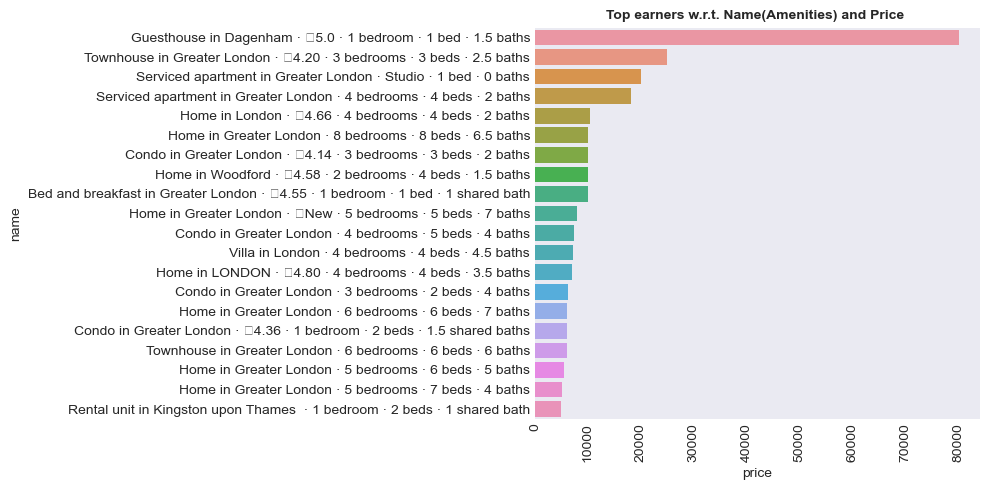

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x='price',y='name',data=top_earners)
plt.xticks(rotation=90)
plt.title("Top earners w.r.t. Name(Amenities) and Price ",fontweight='bold',fontsize=10)

# Question 9 Any particular location getting maximum number of bookings
 **Answer These are the top 3 name of property types having maximum bookings**
1. Boutique hotel in Bayswater  with number of reviews 1536
2. Hotel in Greater London  1267
3. Townhouse in London 1029

**Business Value: Identifying locations with the maximum number of bookings provides valuable insights for both hosts and guests. For hosts, it informs them about popular areas, and for guests, it helps in selecting accommodations based on popularity and reviews.**

In [74]:
maxbooking1=df.groupby(['name'])['number_of_reviews'].mean().reset_index().sort_values(by='number_of_reviews',ascending=False)
maxbooking1=maxbooking1[0:10]
maxbooking1




,name,number_of_reviews
538,Boutique hotel in Bayswater · ★4.54 · 1 bedroo...,1536.0
10573,Hotel in Greater London · ★4.51 · 1 bedroom · ...,1267.0
20679,Townhouse in London · ★4.61 · 1 bedroom · 1 be...,1029.0
20714,Townhouse in London · ★4.70 · 1 bedroom · 1 be...,867.0
15548,Rental unit in Harlington · ★4.68 · 1 bedroom ...,856.0
222,Bed and breakfast in Greater London · ★4.41 · ...,851.0
9179,Home in London · ★4.73 · 1 bedroom · 1 bed · 1...,847.0
18195,Rental unit in Poplar · ★4.91 · 1 bedroom · 1...,800.0
55,Aparthotel in Greater London · ★4.69 · 1 bedro...,790.0
8288,Home in Hounslow · ★4.72 · 1 bedroom · 2 beds ...,771.0


Text(0.5, 1.0, 'Number of Reviews for Selected Listings ')

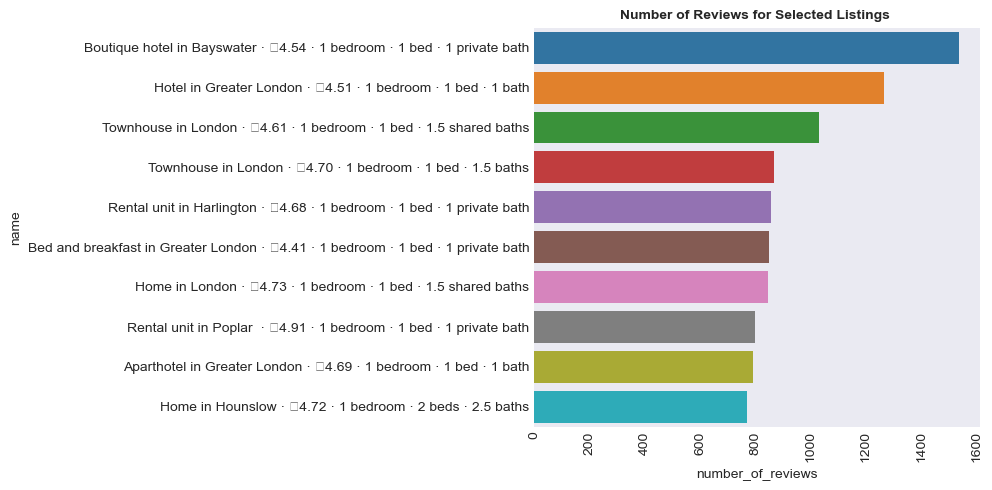

In [75]:

plt.figure(figsize=(10,5))
sns.barplot(x='number_of_reviews',y='name',data=maxbooking1)
plt.xticks(rotation=90)
plt.title("Number of Reviews for Selected Listings ",fontweight='bold',fontsize=10)

# Question 10 - What is Preference of the guests for Room Type

**Answer: From the below visualization we can clearly see that the most prefered room type by the guests is Entire home/apt and the less prefered room type is Hotel room and shared room**

**Business Value: Understanding guest preferences for room types is crucial for hosts and the platform. For hosts, it informs property listing decisions, and for the platform, it helps in tailoring recommendations and improving user experience.**

In [81]:
room_count=df['room_type'].value_counts().reset_index()
room_count.columns=['room type','count']
room_count

,room type,count
0,Entire home/apt,54575
1,Private room,32711
2,Shared room,441
3,Hotel room,219


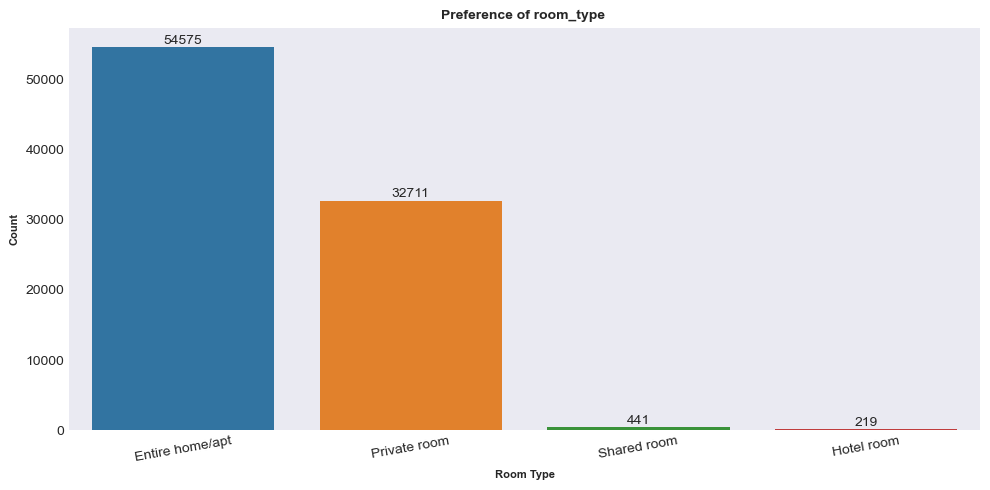

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(x='room type',y='count',data=room_count)
plt.xticks(rotation=10)
plt.title("Preference of room_type ",fontweight='bold',fontsize=10)
plt.xlabel('Room Type',fontsize=8,fontweight='bold')
plt.ylabel('Count',fontsize=8,fontweight='bold')
for i,data in enumerate(room_count['count']):
    plt.text(x=i,y=data+29,s=f'{data}',ha='center',va='bottom')